<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Data_Driven_Models(CocaCola_Sales_Rawdata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ps = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
ps

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


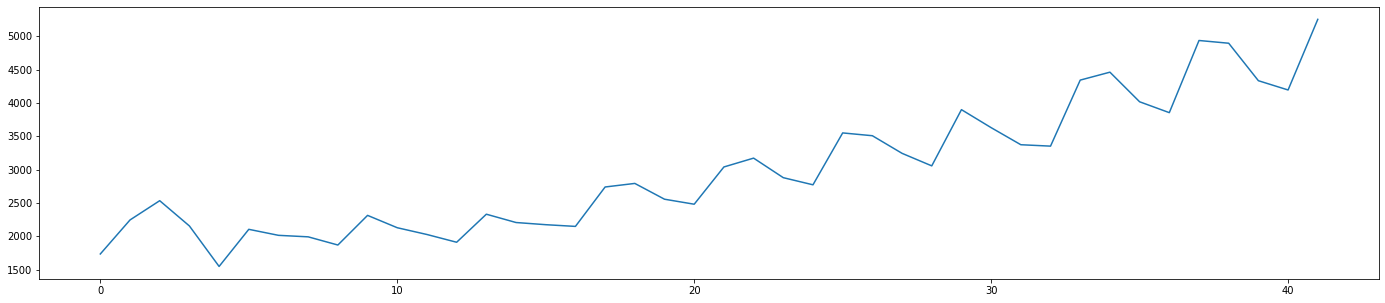

In [4]:
plt.figure(figsize=(24,5))
ps.Sales.plot()

# Splitting data

In [8]:
Train = ps.head(38)
Test = ps.tail(4)

In [9]:
Train

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
Test

,Quarter,Sales
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


# Moving Average 

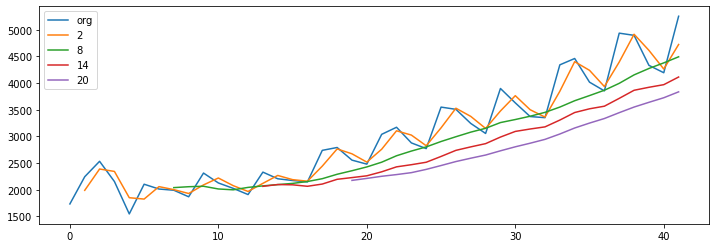

In [10]:
plt.figure(figsize=(12,4))
ps.Sales.plot(label="org")
for i in range(2,24,6):
    ps["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


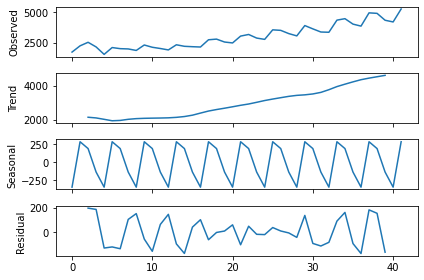

In [11]:
decompose_ts_add = seasonal_decompose(ps.Sales,freq=4)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


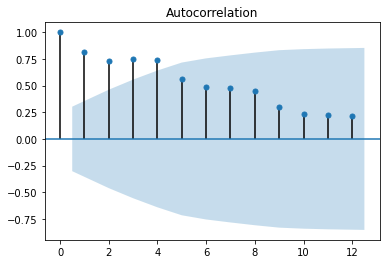

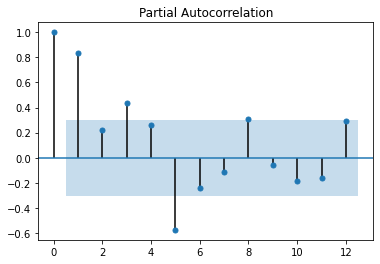

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ps.Sales,lags=12)
tsa_plots.plot_pacf(ps.Sales,lags=12)
plt.show()


### Evaluation Metric MAPE

In [14]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [18]:
ses_model = SimpleExpSmoothing(Train.Sales).fit(smoothing_level=0.5)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


8.304432971479478

### Holt method 

In [19]:
# Holt method 
hw_model = Holt(Train.Sales).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

9.240383094105713

### Holts winter exponential smoothing with additive seasonality and additive trend


In [26]:
hwe_model_add_add = ExponentialSmoothing(Train.Sales,seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

1.5001399183095394

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [27]:
hwe_model_mul_add = ExponentialSmoothing(Train.Sales,seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

1.7781995652452005

## Final Model by combining train and test

In [28]:
hwe_model_add_add = ExponentialSmoothing(ps.Sales,seasonal="add",trend="add",seasonal_periods=4).fit()

In [29]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5210.803500
43    4671.492769
44    4557.222510
45    5654.983415
46    5587.970258
47    5048.659526
48    4934.389268
49    6032.150172
50    5965.137015
51    5425.826283
dtype: float64